# Support Set of Matrix Game
This tutorial investigate the support set size of matrix games.

In [32]:
import sys
sys.path.append("../..")

import numpy as np
import time
from mars.equilibrium_solver import *


Solvers = ['NashEquilibriaSolver', 'NashEquilibriumSolver', 
        'NashEquilibriumLPSolver', 'NashEquilibriumCVXPYSolver', 
        'NashEquilibriumGUROBISolver', 'NashEquilibriumECOSSolver', 
        'NashEquilibriumMWUSolver'][-2:-1]

Matrix_size = 20
Test_times = 10000
################### TEST #################
random_matrices = [np.random.uniform(-1,1,Matrix_size**2).reshape(Matrix_size, Matrix_size) for _ in range(Test_times)]

threshold = 0.1
first_cnts, second_cnts = [], []
for solver in Solvers:
    t0=time.time()
    for i in range(Test_times):
        ne, nev = eval(solver)(random_matrices[i])
        # print(ne[0])
        # print(np.where(ne[0]>0.1)[0].shape[0])
        first_num_entries = np.where(ne[0]>threshold)[0].shape[0] # number of entries with probability > threshold in NE policy
        second_num_entries = np.where(ne[1]>threshold)[0].shape[0]
        first_cnts.append(first_num_entries)
        second_cnts.append(second_num_entries)

    t1=time.time()
    print(solver, ',time taken per matrix: ', (t1-t0)/Test_times)
print(np.bincount(first_cnts))
print(np.bincount(second_cnts))

NashEquilibriumECOSSolver ,time taken per matrix:  0.0006794173240661621
[   0    4  191 1483 3978 3320  946   78]
[   0    6  166 1565 3926 3380  882   75]


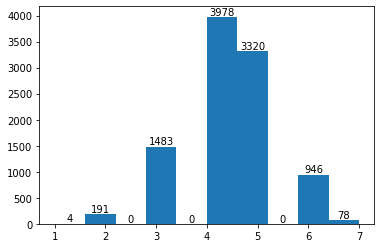

In [33]:
import matplotlib.pyplot as plt              
counts, edges, bars = plt.hist(first_cnts)

plt.bar_label(bars)

plt.show()